The RMS Titanic was known as the unsinkable ship and was the largest, most luxurious
passenger ship of its time. Sadly, the British ocean liner sank on April 15, 1912,
killing over 1500 people while just 705 survived.

Exploratory Data Analysis (EDA) of the titanic dataset
See https://www.encyclopedia-titanica.org/

The cleaned dataset contains outliers, and text variables for feature engineering.

In [2]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
# Load the original titanic dataset and view
eda = pd.read_csv("datasets/cleaned_titanic.csv")
eda.head()

pclass  sex    age  sibsp  parch      fare  embarked  deck  survived
0       1    0  29.00      0      0  211.3375         2     1         1
1       1    1   0.92      1      2  151.5500         2     2         1
2       1    0   2.00      1      2  151.5500         2     2         0
3       1    1  30.00      1      2  151.5500         2     2         0
4       1    0  25.00      1      2  151.5500         2     2         0

In [4]:
# Check for any null values in the dataset
eda.isnull().any().any()

False

<AxesSubplot:title={'center':'Pearson correlation of continuous features'}>

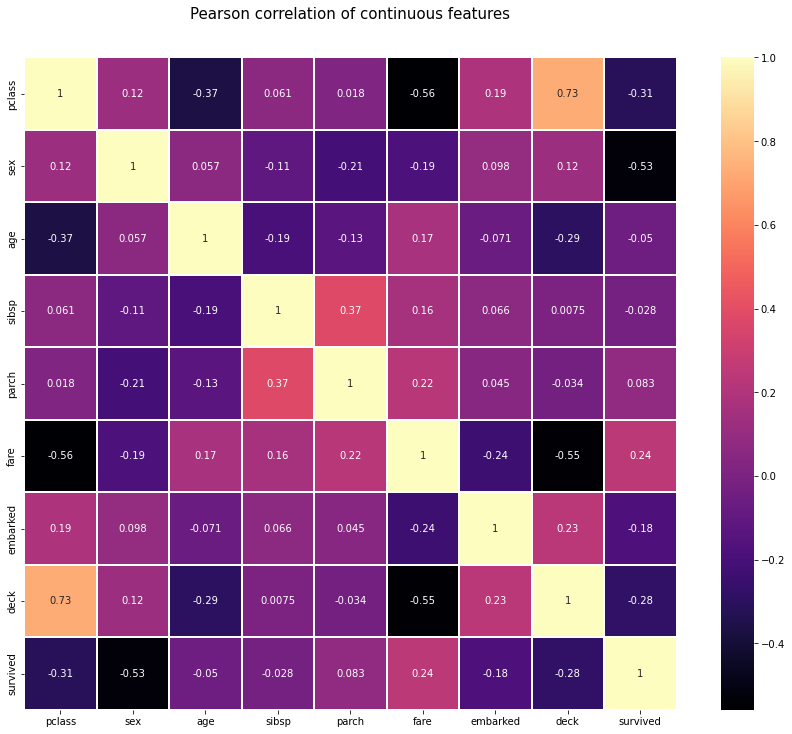

In [5]:
# Correlation map of continuous features
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Pearson correlation of continuous features", y=1.05, size=15)
sns.heatmap(
    eda.corr(),
    linewidths=0.1,
    vmax=1.0,
    square=True,
    cmap=colormap,
    linecolor="white",
    annot=True,
)

<AxesSubplot:>

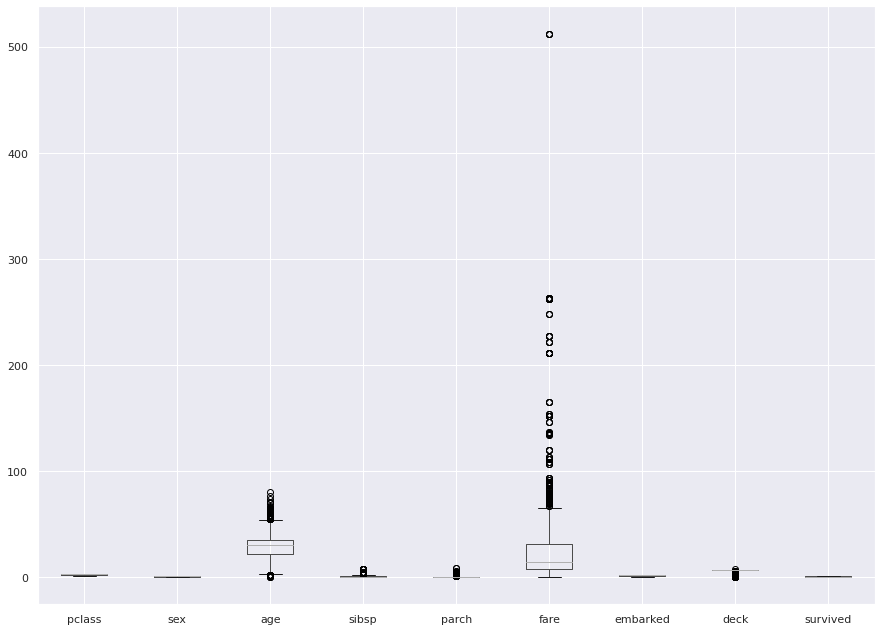

In [6]:
# Check for outliers in the dataset

# boxplot is a visualization tool for identifying outliers, it
# displays the distribution of statistical observations, its
# body is classified into four parts; the lowest and the
# highest(minimum and maximum), the 25 percentile(first
# quartile(Q1)), the median(50th percentile), the 75th
# percentile(third quartile(Q3)).

# Outliers appear above or below the minimum and maximum of the boxplot.

sns.set(rc={"figure.figsize": (15, 11)})
eda.boxplot()

Outliers are present in four different columns, two of which can be ignored,
and the 'age' and 'fare' column outliers can be fixed.

<AxesSubplot:>

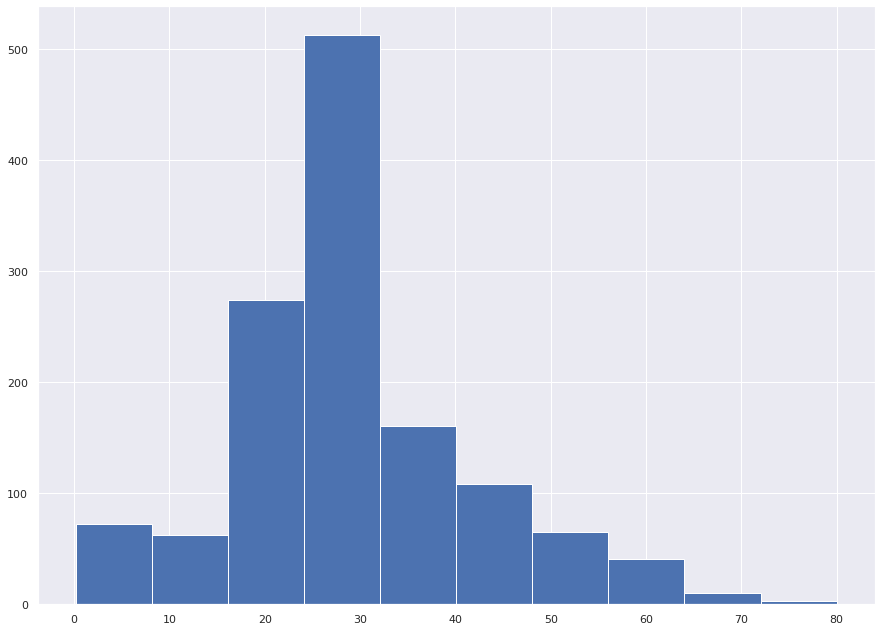

In [7]:
# To visualize the distribution of a numerical variable better, a
# histogram shows the direction in which these variables are
# distributed, outliers will appear outside the overall distribution
# of the data. If the histogram is right-skewed or left-skewed, it
# indicates the presence of extreme values or outliers.
eda["age"].hist()

<AxesSubplot:>

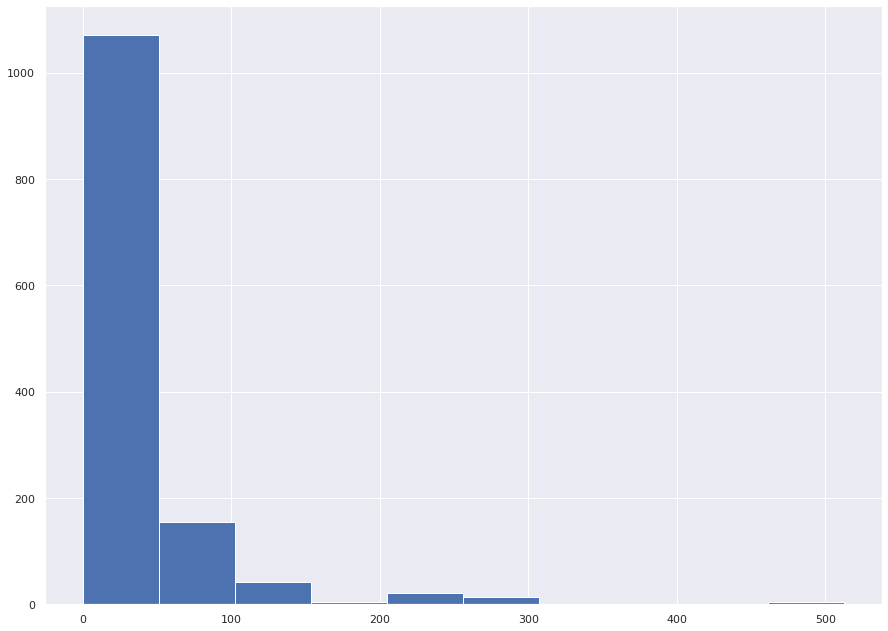

In [8]:
eda["fare"].hist()

In [9]:
# The skewness value should be within the range of -1 to 1 for
# a normal distribution. Any major changes from this value may
# indicate the presence of outliers.
print("skewness value of age: ", eda["age"].skew())
print("skewness value of fare: ", eda["fare"].skew())

skewness value of age:  0.45592374440087013
skewness value of fare:  4.369374593951007


The 'age' skewness is within the -1 to 1 range. The ‘fare’ skewness value of 4.37 shows the
variable has been rightly skewed, indicating the extreme presence of outliers.

In [10]:
# Age (cut) and fare (qcut) can be binned, but see the use of IQR below.
# eda['age'] = pd.cut(eda['age'].astype(int), 5)
# eda['age'].value_counts()
# eda[['age','survived']].groupby('age')['survived'].mean().plot(kind='bar',figsize=(15,7))

In [11]:
# The interquartile range (midspread, middle 50%, or H‑spread) is
# a measure of statistical  dispersion and is calculated as the
# difference between 75th and 25th percentiles.
# The Quartiles divide the data set into four equal parts.
# The values that separate parts are called the first, second,
# and third quartiles.

# The interquartile range value of the ‘fare’ variable:
Q1_fare = eda["fare"].quantile(0.25)
Q3_fare = eda["fare"].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Use the 75th percentile of the `fare` variable in flooring and capping.
whisker_width = 1.5
upper_whisker_fare = Q3_fare + whisker_width * IQR_fare
upper_whisker_fare

66.34379999999999

In [12]:
outlier_values_fare = eda[(eda["fare"] > upper_whisker_fare)]
outlier_values_fare

pclass  sex        age  sibsp  parch      fare  embarked  deck  survived
0          1    0  29.000000      0      0  211.3375         2     1         1
1          1    1   0.920000      1      2  151.5500         2     2         1
2          1    0   2.000000      1      2  151.5500         2     2         0
3          1    1  30.000000      1      2  151.5500         2     2         0
4          1    0  25.000000      1      2  151.5500         2     2         0
...      ...  ...        ...    ...    ...       ...       ...   ...       ...
1176       3    1  29.881138      8      2   69.5500         2     7         0
1177       3    1  29.881138      8      2   69.5500         2     7         0
1178       3    1  29.881138      8      2   69.5500         2     7         0
1179       3    1  29.881138      1      9   69.5500         2     7         0
1180       3    0  29.881138      1      9   69.5500         2     7         0

[171 rows x 9 columns]

In [13]:
eda["fare"] = np.where(
    eda["fare"] > upper_whisker_fare, eda["fare"].quantile(0.85), eda["fare"]
)

In [14]:
# And although the skewness value of `age` is well within the range of -1 to 1:
# The interquartile range value of the ‘fare’ variable:
Q1_age = eda["age"].quantile(0.25)
Q3_age = eda["age"].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Use the 75th percentile of the `fare` variable in flooring and capping.
whisker_width = 1.5
upper_whisker_age = Q3_age + whisker_width * IQR_age

outlier_values_age = eda[(eda["age"] > upper_whisker_age)]

eda["age"] = np.where(
    eda["age"] > upper_whisker_age, eda["age"].quantile(0.95), eda["age"]
)

<AxesSubplot:>

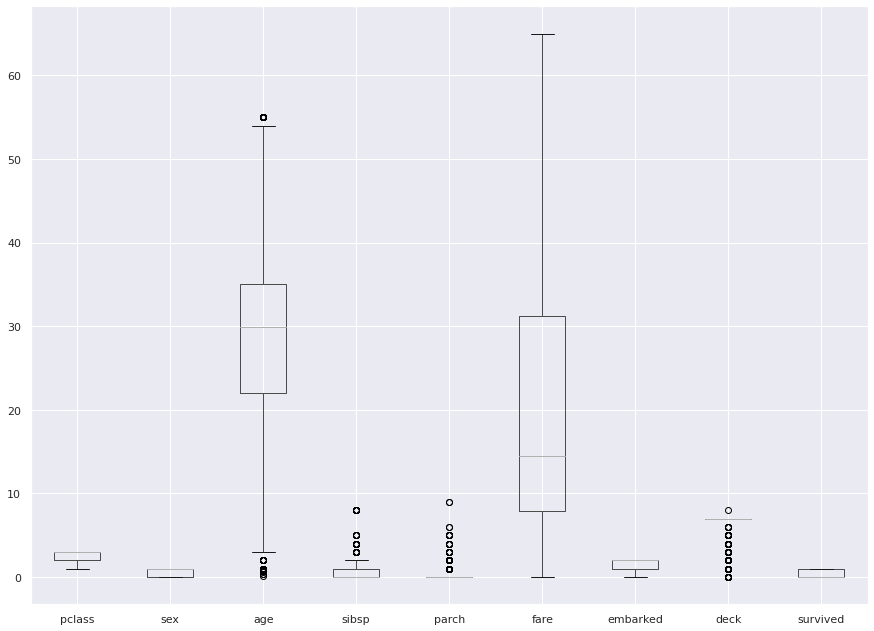

In [15]:
# Check outlier results
eda.boxplot()

<AxesSubplot:title={'center':'Pearson correlation of continuous features'}>

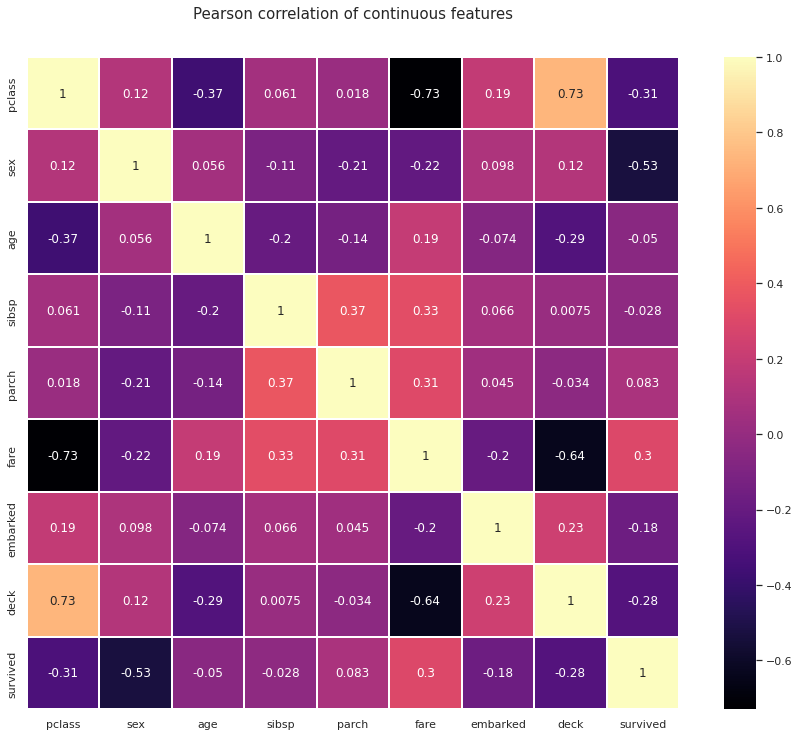

In [16]:
# Correlation map of continuous features
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Pearson correlation of continuous features", y=1.05, size=15)
sns.heatmap(
    eda.corr(),
    linewidths=0.1,
    vmax=1.0,
    square=True,
    cmap=colormap,
    linecolor="white",
    annot=True,
)

In [17]:
# New feature: family size
eda["familysize"] = eda["sibsp"] + eda["parch"] + 1
# Separating out the children in a new feature: gender
eda["gender"] = eda.apply(lambda n: 2 if n["age"] < 15 else n["sex"], axis=1)
eda.head(10)

pclass  sex    age  sibsp  parch     fare  embarked  deck  survived  \
0       1    0  29.00      0      0  56.9292         2     1         1   
1       1    1   0.92      1      2  56.9292         2     2         1   
2       1    0   2.00      1      2  56.9292         2     2         0   
3       1    1  30.00      1      2  56.9292         2     2         0   
4       1    0  25.00      1      2  56.9292         2     2         0   
5       1    1  48.00      0      0  26.5500         2     4         1   
6       1    0  55.00      1      0  56.9292         2     3         1   
7       1    1  39.00      0      0   0.0000         2     0         0   
8       1    0  53.00      2      0  51.4792         2     2         1   
9       1    1  55.00      0      0  49.5042         0     7         0   

   familysize  gender  
0           1     0.0  
1           4     2.0  
2           4     2.0  
3           4     1.0  
4           4     0.0  
5           1     1.0  
6           2     0.0  
7           1     1.0  
8           3     0.0  
9           1     1.0

In [18]:
# Dummify `gender` and `embarked`
eda = pd.get_dummies(eda, columns=["gender", "embarked"], drop_first=True)
# Drop `sex` , `sibsp` and `parch`
eda = eda.drop(["sex", "sibsp", "parch"], axis=1)
eda.head(10)

pclass    age     fare  deck  survived  familysize  gender_1.0  gender_2.0  \
0       1  29.00  56.9292     1         1           1           0           0   
1       1   0.92  56.9292     2         1           4           0           1   
2       1   2.00  56.9292     2         0           4           0           1   
3       1  30.00  56.9292     2         0           4           1           0   
4       1  25.00  56.9292     2         0           4           0           0   
5       1  48.00  26.5500     4         1           1           1           0   
6       1  55.00  56.9292     3         1           2           0           0   
7       1  39.00   0.0000     0         0           1           1           0   
8       1  53.00  51.4792     2         1           3           0           0   
9       1  55.00  49.5042     7         0           1           1           0   

   embarked_1  embarked_2  
0           0           1  
1           0           1  
2           0           1  
3           0           1  
4           0           1  
5           0           1  
6           0           1  
7           0           1  
8           0           1  
9           0           0

Text(0.5, 1.0, 'Correlation between features')

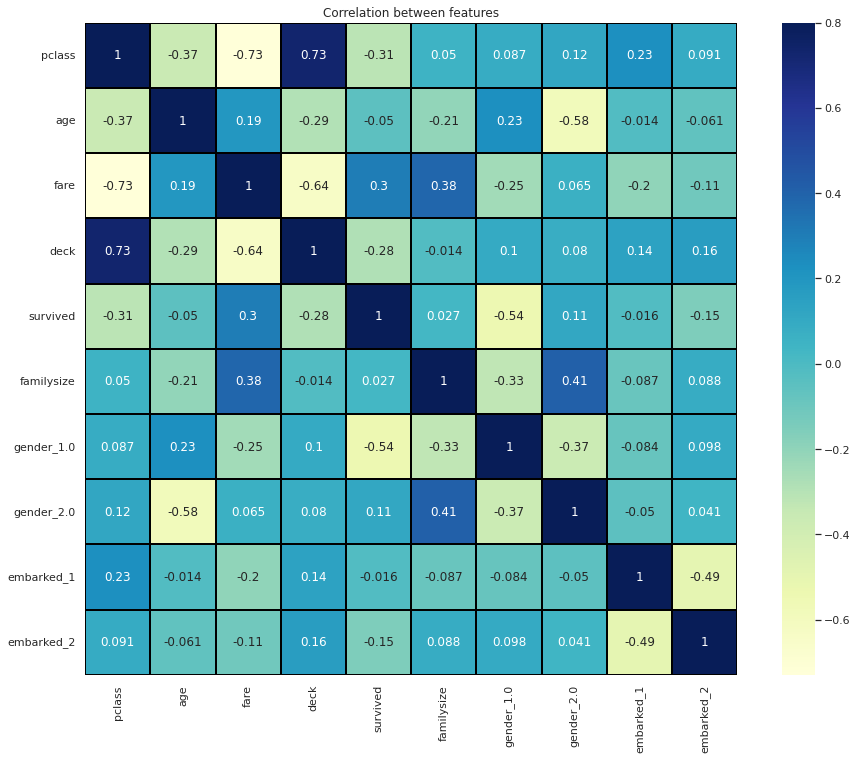

In [19]:
# Correlation map again
correlation = eda.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation,
    vmax=0.8,
    linewidth=0.01,
    square=True,
    annot=True,
    cmap="YlGnBu",
    linecolor="black",
)
plt.title("Correlation between features")

In [20]:
eda.to_csv("datasets/featured_titanic.csv", index=False)